In [1]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
# Model-specific imports:
from sklearn.svm import SVR
from sklearn.ensemble import BaggingRegressor
from sklearn.datasets import make_regression

In [3]:
inputData = pd.read_excel(r'/Users/harshilkalsi/Downloads/Volumetric_features.xlsx', engine='openpyxl').sample(frac = 1)

inputData.head()

,S.No,Left-Lateral-Ventricle,Left-Inf-Lat-Vent,Left-Cerebellum-White-Matter,Left-Cerebellum-Cortex,Left-Thalamus,Left-Caudate,Left-Putamen,Left-Pallidum,3rd-Ventricle,...,rh_supramarginal_thickness,rh_frontalpole_thickness,rh_temporalpole_thickness,rh_transversetemporal_thickness,rh_insula_thickness,rh_MeanThickness_thickness,BrainSegVolNotVent.2,eTIV.1,Age,dataset
1813,1814,9043.9,307.6,17559.7,50335.8,7738.6,3505.9,4810.6,2010.0,1074.2,...,2.387,2.741,3.666,2.073,2.802,2.36172,1066541,1443802.968,48,4
327,328,41716.8,1277.6,13736.6,48669.4,7840.0,2900.2,4425.1,1995.5,2116.2,...,2.332,2.842,3.315,1.878,2.936,2.21468,1104361,1843167.125,76,1
2165,2166,6163.8,196.0,17557.4,41284.6,6740.4,3064.5,2764.9,2199.9,1067.4,...,2.399,2.767,3.370,2.393,3.031,2.30174,936862,1272262.798,58,4
3933,3934,15143.9,317.4,13980.6,51529.9,8099.3,3444.7,4402.1,2116.5,886.5,...,2.542,2.861,3.920,2.609,2.923,2.46696,1178450,1561852.556,50,9
1058,1059,15900.7,806.3,13000.6,40951.8,5359.0,2938.5,4022.5,1843.6,2208.4,...,2.013,2.627,3.418,1.946,2.671,2.09088,961534,1429324.280,76,1


In [4]:
# # select the input brain volume vector (X) and the output age vector (y)
X = inputData.drop(columns=['S.No', 'Age', 'dataset'])
y = inputData['Age']

# split the X and y vectors into training and testing dataset
# we're using 80% for training and 20% for testing, but this can change
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [5]:
# instantiate a linear regression model using sklearn:
reg = BaggingRegressor(random_state=0)

# fit the model to the training data
reg.fit(X_train, y_train)

BaggingRegressor(random_state=0)

In [6]:
# check the model's performance on unseen, test data
predictions = reg.predict(X_test)

# compare the predictions to the known values (y_test)
print('r square value:', metrics.r2_score(y_test, predictions))
print('mean absolute error (years):', metrics.mean_absolute_error(y_test, predictions))
print('mean square error:', metrics.mean_squared_error(y_test, predictions))
print('root mean absolute error (years):', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

r square value: 0.8372154504329253
mean absolute error (years): 5.770921985815603
mean square error: 65.69903073286052
root mean absolute error (years): 8.10549386113274


/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

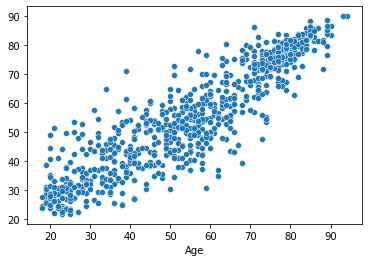

In [9]:
# plotting
import seaborn as sns
sns.scatterplot(y_test, predictions)

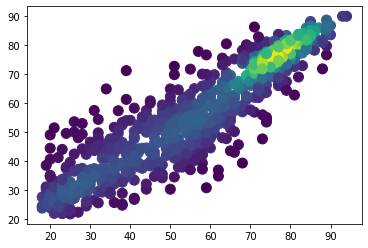

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# Calculate the point density
xy = np.vstack([y_test,predictions])
z = gaussian_kde(xy)(xy)

fig,ax = plt.subplots()
ax.scatter(y_test, predictions, c=z, s=100)
plt.show()